# Fraud Detection in Transactions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
#Going through the data
#First few values
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [4]:
#Last few values
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
#Checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#To print the datatype of columns
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#To inspect the shape of the datset
df.shape

(6362620, 11)

## 1. Data cleaning including missing values, outliers and multi-collinearity.

### Checking missing values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

In [9]:
# Print missing values for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### Checking for outliers

In [10]:
#Checking for outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

C:\Users\jjk\AppData\Local\Temp\ipykernel_14776\1961750408.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\jjk\AppData\Local\Temp\ipykernel_14776\1961750408.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [11]:
# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

C:\Users\jjk\AppData\Local\Temp\ipykernel_14776\1272192153.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [12]:
# Print the number of outliers in each column
print("Number of outliers in each column:\n", outliers.sum())

Number of outliers in each column:
 amount             338078
isFlaggedFraud         16
isFraud              8213
nameDest                0
nameOrig                0
newbalanceDest     738527
newbalanceOrig    1053391
oldbalanceDest     786135
oldbalanceOrg     1112507
step               102688
type                    0
dtype: int64


In [13]:
# Print the total number of outliers in the dataset
total_outliers = outliers.any(axis=1).sum()
print("\nTotal number of outliers in the dataset:", total_outliers)


Total number of outliers in the dataset: 2043214


### Checking for Multi-collinearity 

In [14]:
#Checking for the multi-collinearity
# Compute the correlation matrix
correlation_matrix = df.corr()

C:\Users\jjk\AppData\Local\Temp\ipykernel_14776\3615591819.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


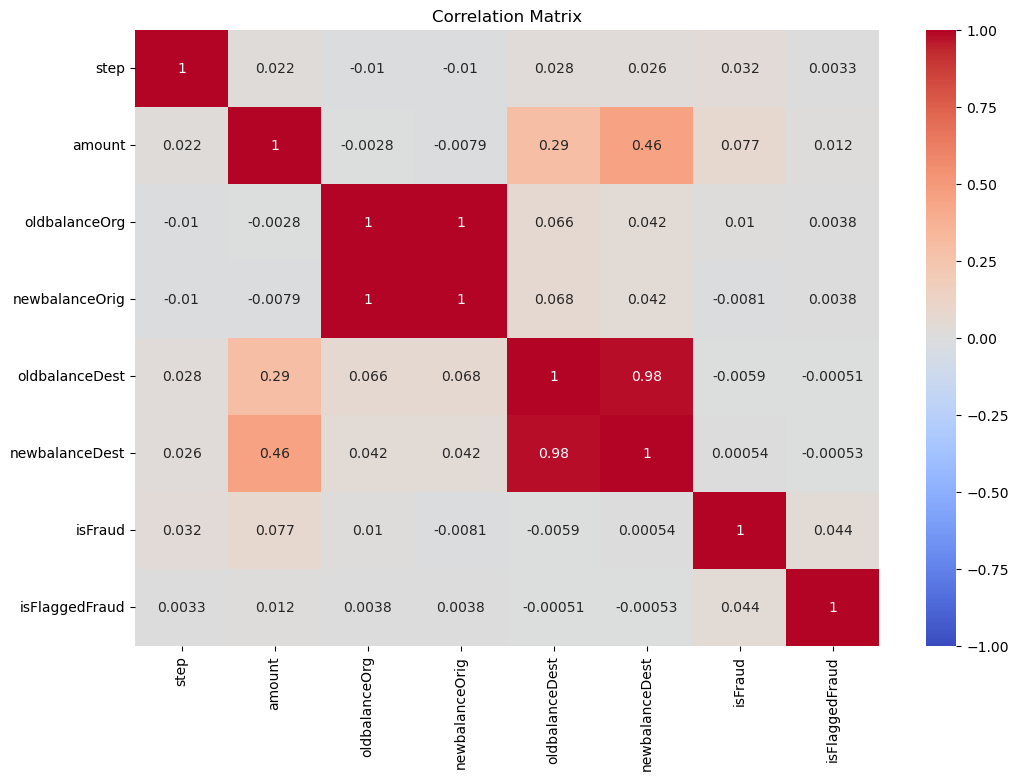

In [15]:
# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Print high correlations
high_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
print("High correlations:\n", high_corr)

High correlations:
                 step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step             1.0     NaN            NaN             NaN             NaN   
amount           NaN     1.0            NaN             NaN             NaN   
oldbalanceOrg    NaN     NaN       1.000000        0.998803             NaN   
newbalanceOrig   NaN     NaN       0.998803        1.000000             NaN   
oldbalanceDest   NaN     NaN            NaN             NaN        1.000000   
newbalanceDest   NaN     NaN            NaN             NaN        0.976569   
isFraud          NaN     NaN            NaN             NaN             NaN   
isFlaggedFraud   NaN     NaN            NaN             NaN             NaN   

                newbalanceDest  isFraud  isFlaggedFraud  
step                       NaN      NaN             NaN  
amount                     NaN      NaN             NaN  
oldbalanceOrg              NaN      NaN             NaN  
newbalanceOrig             NaN      

## 2. Describe your fraud detection model in elaboration. 

In [17]:
# Calculate the number of legitimate and fraudulent transactions
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])

In [18]:
# Calculate the percentages
total = fraud + legit
legit_percent = (legit / total) * 100
fraud_percent = (fraud / total) * 100

In [19]:
# Print the results
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


## 3. How did you select variables to be included in the model?
 

In [20]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [21]:
# Customers
Y = df[df['nameDest'].str.contains('C')]
Y.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


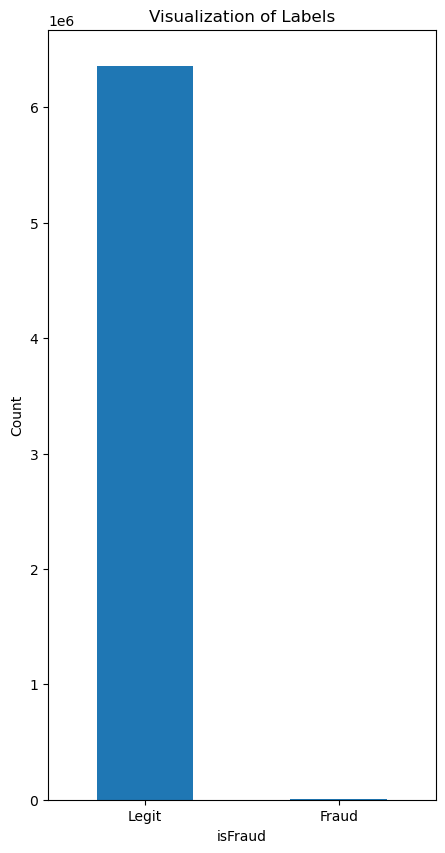

In [22]:
#NUMBER OF LEGIT AND FRAUD TRANSACTIONS
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

C:\Users\jjk\AppData\Local\Temp\ipykernel_14776\3589844649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


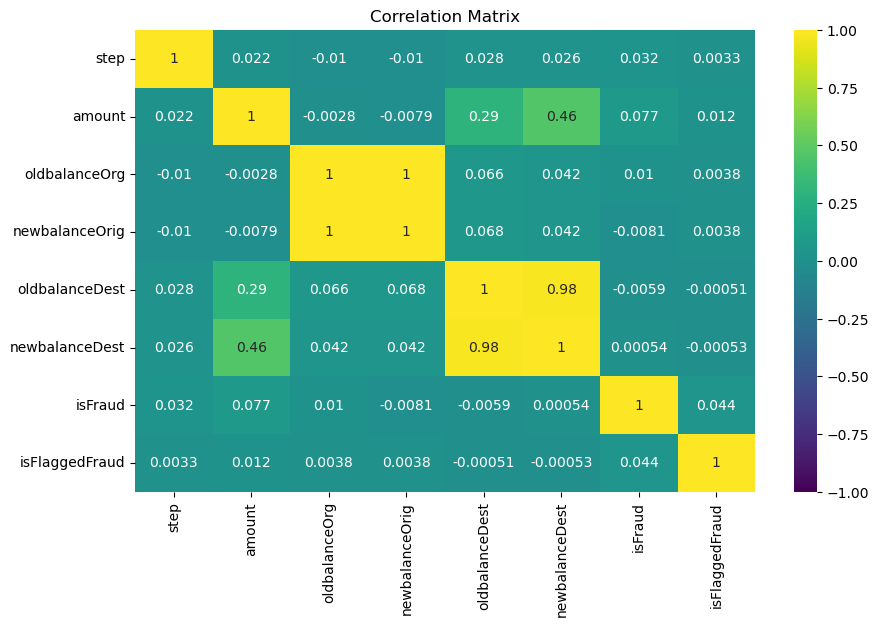

In [23]:
#Let's check for correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
#Problem solving
copy_df=df.copy()
copy_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
#Label Encoding
# Checking how many attributes are dtype: object
objList = copy_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [26]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    copy_df[feat] = le.fit_transform(copy_df[feat].astype(str))

print (copy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [27]:
copy_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [28]:
#Let's check for the multicollinearity issue by the use of VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(copy_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [29]:
copy_df['Actual_amount_orig'] = copy_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
copy_df['Actual_amount_dest'] = copy_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
copy_df['TransactionPath'] = copy_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Drop columns
copy_df = copy_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(copy_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

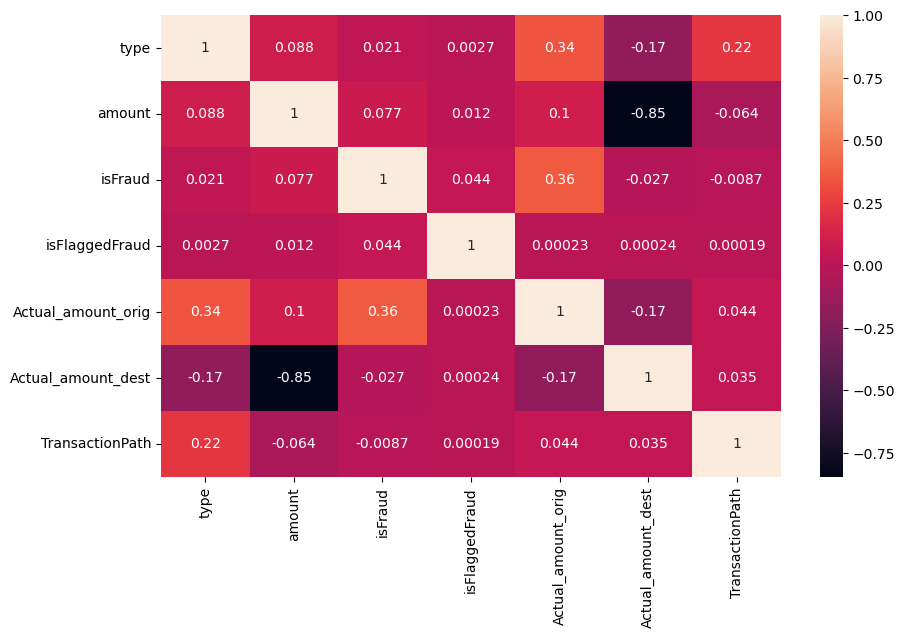

In [30]:
#Now, let's check the correlation again
corr=copy_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [31]:
#Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
# Performing Scaling
scaler = StandardScaler()
copy_df["NormalizedAmount"] = scaler.fit_transform(copy_df["amount"].values.reshape(-1, 1))

# Drop the original 'amount' column
copy_df.drop(["amount"], inplace=True, axis=1)

# Separate the target variable 'isFraud' from the features
Y = copy_df["isFraud"]
X = copy_df.drop(["isFraud"], axis=1)

# Display the first few rows to verify
print(copy_df.head())
print("Features shape:", X.shape)
print("Target shape:", Y.shape)

   type  isFraud  isFlaggedFraud  Actual_amount_orig  Actual_amount_dest  \
0     3        0               0             9839.64                 0.0   
1     3        0               0             1864.28                 0.0   
2     4        1               0              181.00                 0.0   
3     1        1               0              181.00             21182.0   
4     3        0               0            11668.14                 0.0   

   TransactionPath  NormalizedAmount  
0        2419963.0         -0.281560  
1        3922922.0         -0.294767  
2        1441841.0         -0.297555  
3        6219958.0         -0.297555  
4        4274900.0         -0.278532  
Features shape: (6362620, 6)
Target shape: (6362620,)


In [33]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [34]:
#Model training
# RANDOM FOREST
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [35]:
#Evaluation
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95871721607347


## 4. Demonstrate the performance of the model by using best set of tools. 

In [36]:
#Confusion Matrix - Random Forest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 1712
False Positives: 65
True Negatives: 1906286
False Negatives: 723


In [37]:
# confusion matrix

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906286      65]
 [    723    1712]]


In [38]:
# classification report

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



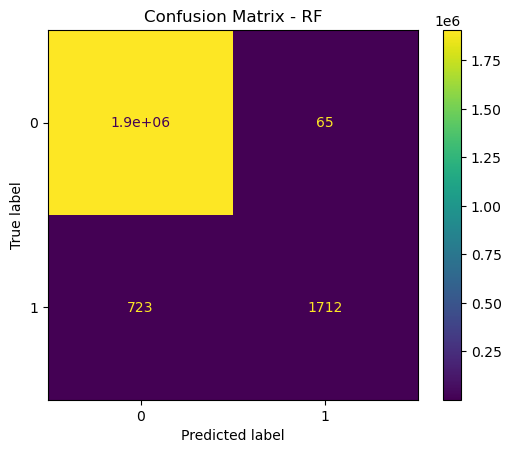

In [39]:
# visualising confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

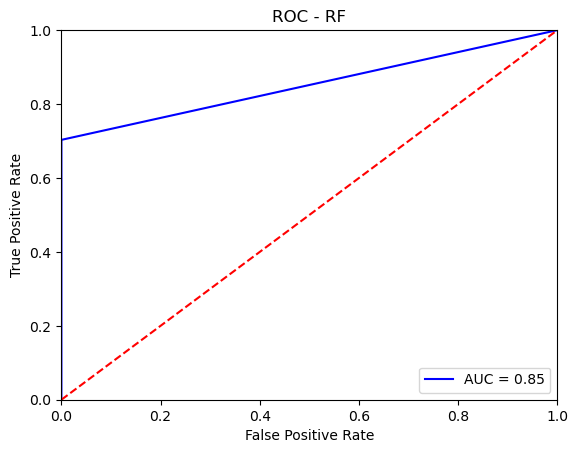

In [40]:
# AUC ROC 
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. What are the key factors that predict fraudulent customer? 

## 6. Do these factors make sense? If yes, How? If not, How not?

## 7. What kind of prevention should be adopted while company update its infrastructure?

## 8. Assuming these actions have been implemented, how would you determine if they work?